In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print(f'training dataset length is {str(len(x_train))}\ntesting dataset length is {str(len(x_test))}')

training dataset length is 60000
testing dataset length is 10000


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Creating layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_23 (Dense)            (None, 128)               1179776   
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                     

In [ ]:
#Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train=model.fit(x_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 2/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 3/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 4/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 5/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9989
Epoch 6/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 7/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0042 - accuracy: 0.9991
Epoch 8/10
3000/3000 [==============================] - 10s 3ms/step - loss: 9.7510e-04 - accuracy: 0.9997
Epoch 9/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 10/10
3000/3000 [==============================] - 11s 4ms/step

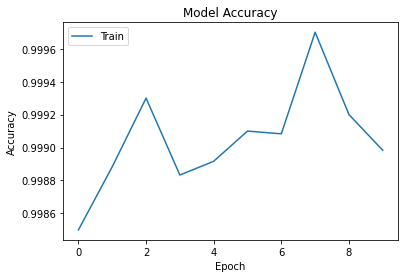

In [ ]:
#Graph for Accuracy
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

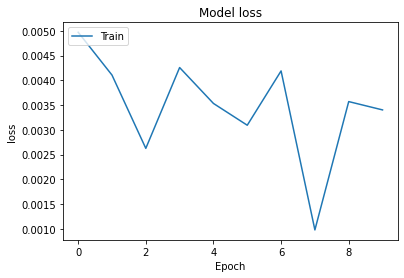

In [ ]:
#Graph for loss function
plt.plot(train.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

In [ ]:
#Evaluating Model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0964 - accuracy: 0.9900


[0.09636814892292023, 0.9900000095367432]